In [20]:
import pandas as pd
from datetime import datetime, timedelta

# Load the Excel file (Q4 sheet)
excel_file_path = '../take_home_assessment.xlsx'  # Replace with the correct path
sheet_data = pd.read_excel(excel_file_path, sheet_name='Q4', header=None)

# Extract segment names
segments = [
    'seg_3131112',
    'seg_3181097',
    'seg_2610958',
    'seg_3184064',
    'seg_3131568',
    'seg_2705166',
    'seg_2852761',
    'seg_2611542',
    'seg_3090467',
]

# Generate the date range
start_date = datetime.strptime("2021-02-10", "%Y-%m-%d")
end_date = datetime.strptime("2021-02-22", "%Y-%m-%d")
date_range = [start_date + timedelta(days=i) for i in range((end_date - start_date).days + 1)]

# Create a DataFrame with the required format
formatted_data = pd.DataFrame(
    [(date.strftime("%Y-%m-%dT00:00:00.000Z"), segment) for date in date_range for segment in segments],
    columns=["timestamp", "full_name"]
)

# Define the cell ranges for each date
cell_ranges = {
    "2021-02-10": "C4:C12",
    "2021-02-11": "C15:C23",
    "2021-02-12": "C26:C34",
    "2021-02-13": "C37:C45",
    "2021-02-14": "C48:C56",
    "2021-02-15": "C59:C67",
    "2021-02-16": "C70:C78",
    "2021-02-17": "C81:C89",
    "2021-02-18": "C92:C100",
    "2021-02-19": "C103:C111",
    "2021-02-20": "C114:C122",
    "2021-02-21": "C125:C133",
    "2021-02-22": "C136:C144",
}

# Fetch and clean the volume values for each date range
volume_values = []
for date, cell_range in cell_ranges.items():
    # Extract row indices from the cell range (e.g., C4:C12 -> rows 3 to 11, zero-indexed)
    start_row, end_row = [int(cell[1:]) - 1 for cell in cell_range.split(":")]
    daily_values = sheet_data.iloc[start_row:end_row + 1, 2].astype(str)  # Convert to string for regex cleaning
    daily_values = daily_values.str.extract(r'(\d+\.\d+|\d+)').astype(float)  # Remove non-numeric characters
    volume_values.extend(daily_values[0].tolist())

# Adjust the length of `volume_values` to match the DataFrame
# If fewer values are present, pad with NaN; if extra, truncate
expected_length = len(formatted_data)
if len(volume_values) < expected_length:
    volume_values.extend([float('nan')] * (expected_length - len(volume_values)))
elif len(volume_values) > expected_length:
    volume_values = volume_values[:expected_length]

# Add the volume column to the formatted data
formatted_data["volume"] = volume_values

# Remove 'seg_' prefix from the 'full_name' column
formatted_data["full_name"] = formatted_data["full_name"].str.replace('seg_', '', regex=False)

# Save the updated DataFrame to a CSV file
updated_csv_path = 'clean_data.csv'
formatted_data.to_csv(updated_csv_path, index=False)

print(f"Cleaned data saved to {updated_csv_path}")


Cleaned data saved to clean_data.csv


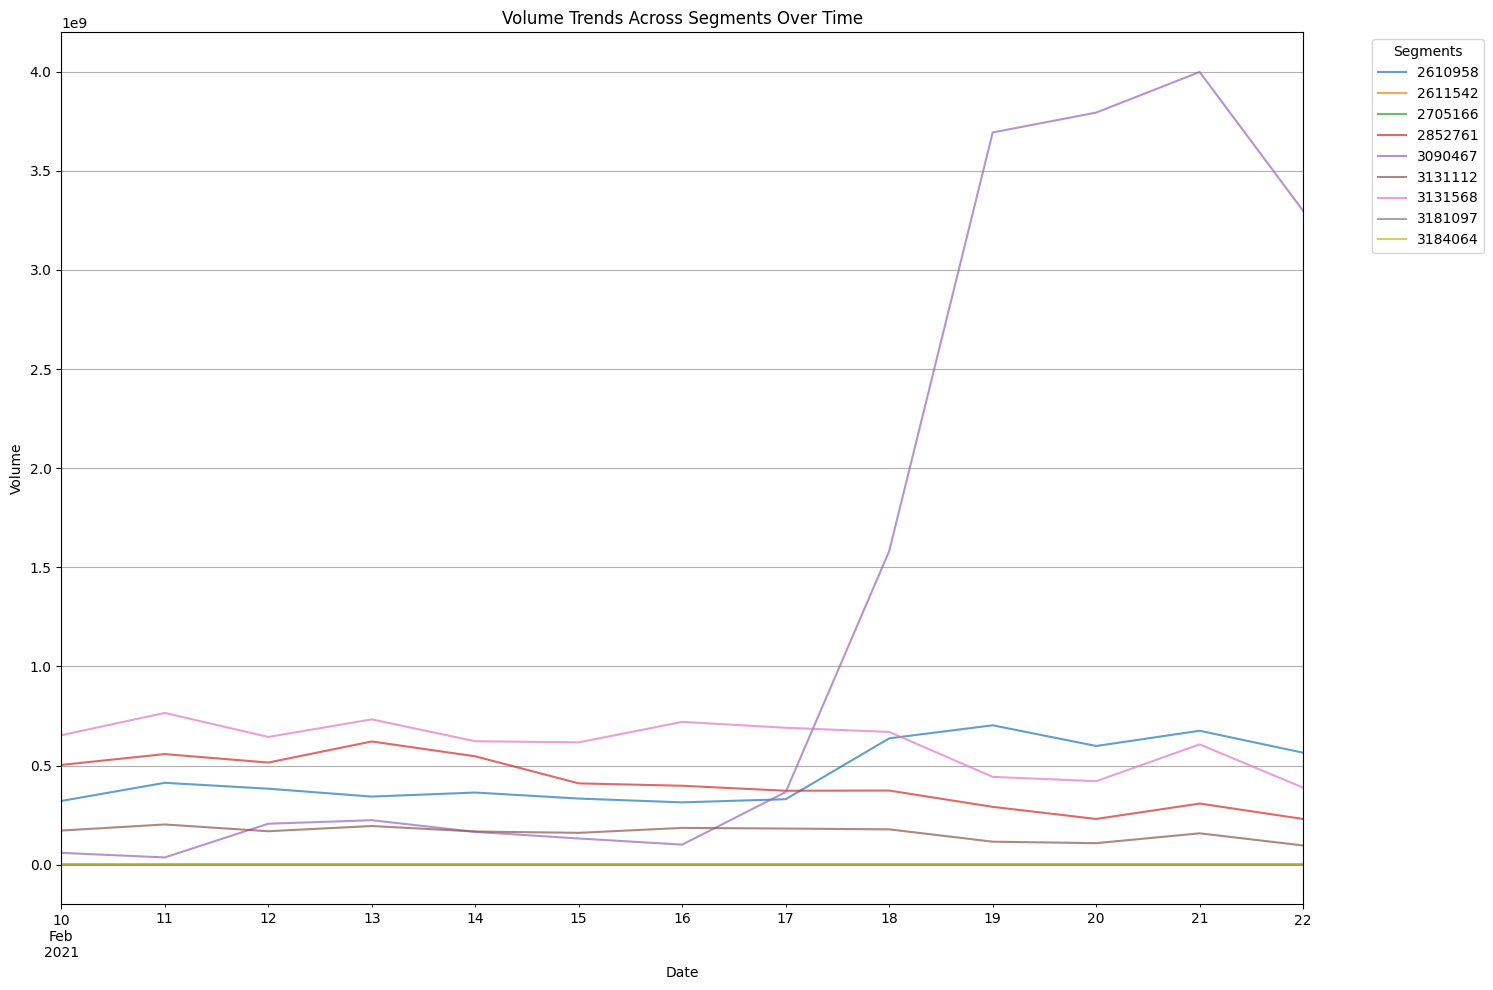

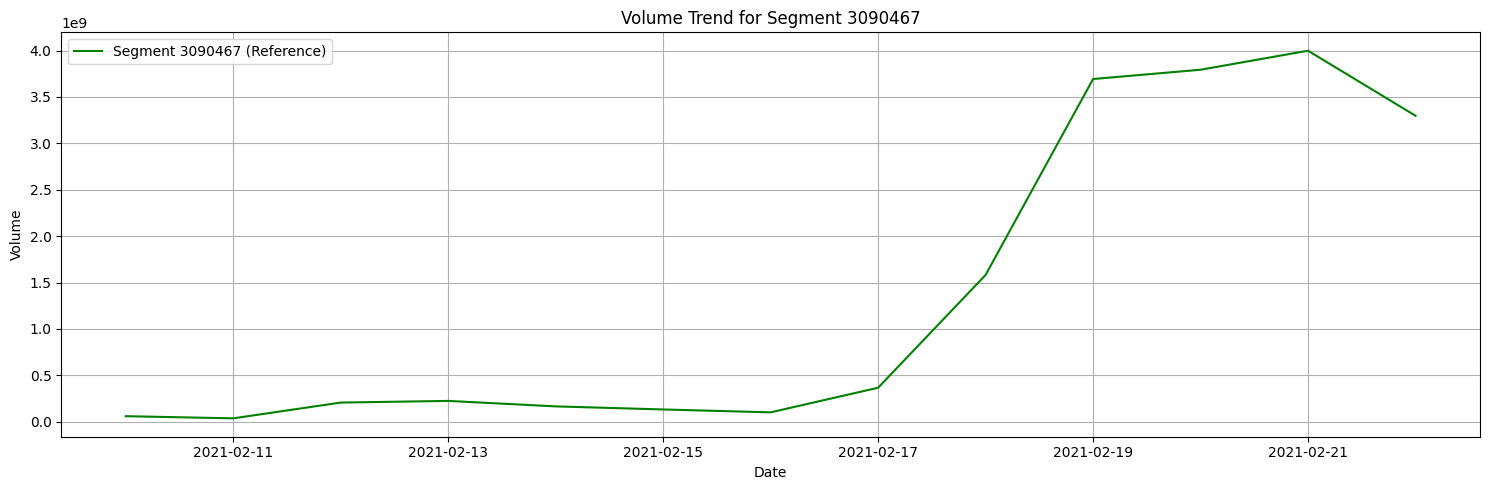

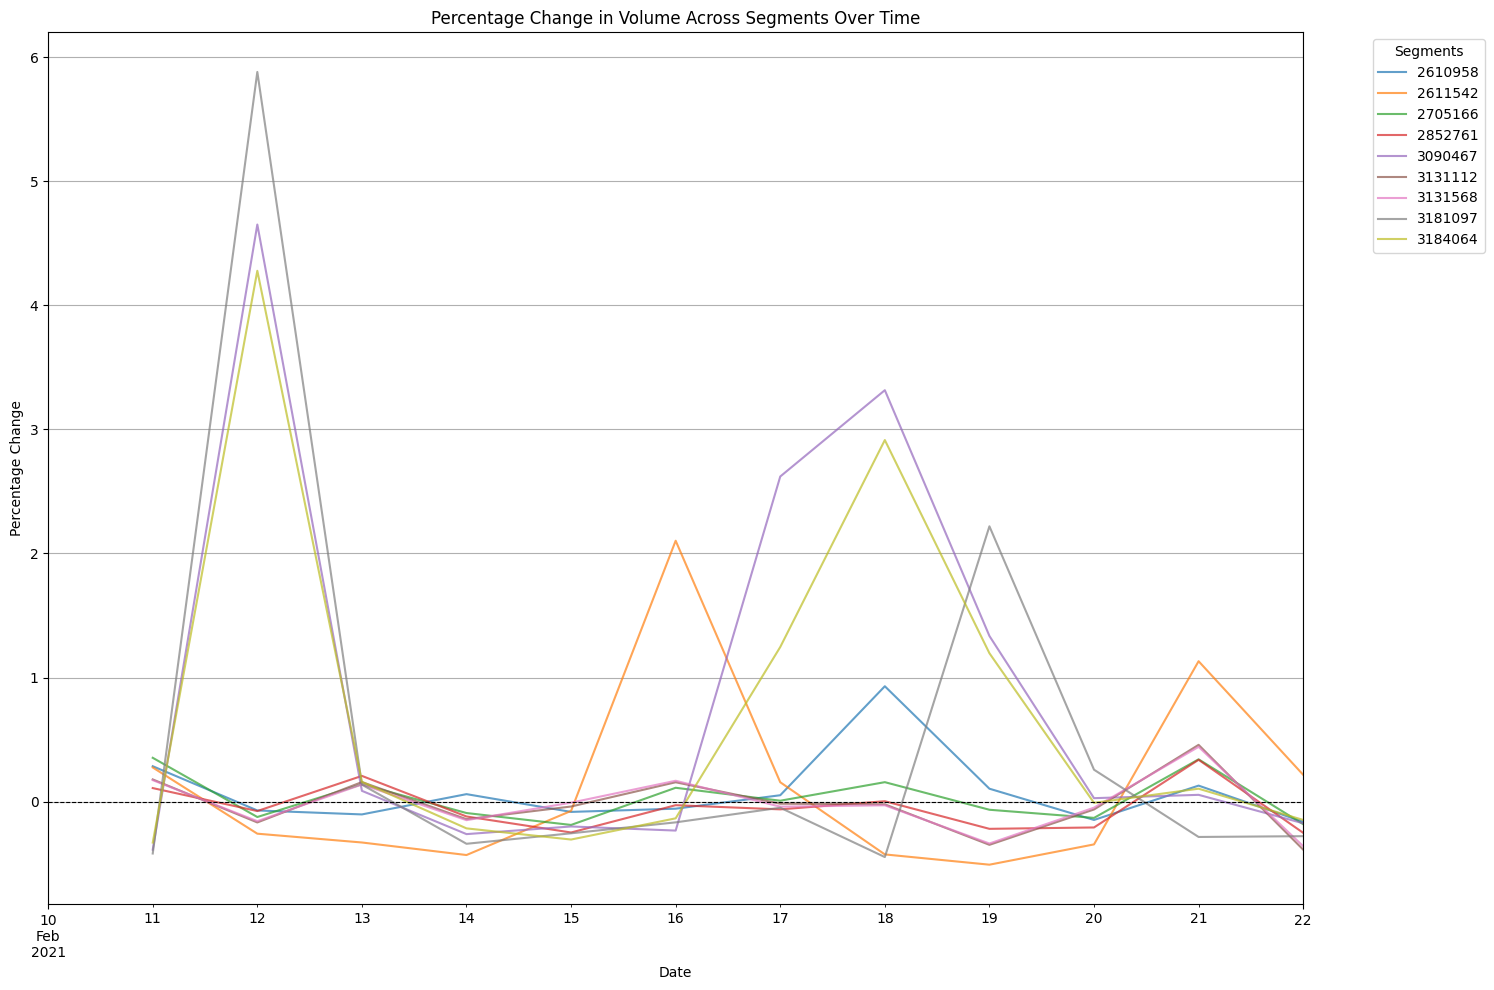

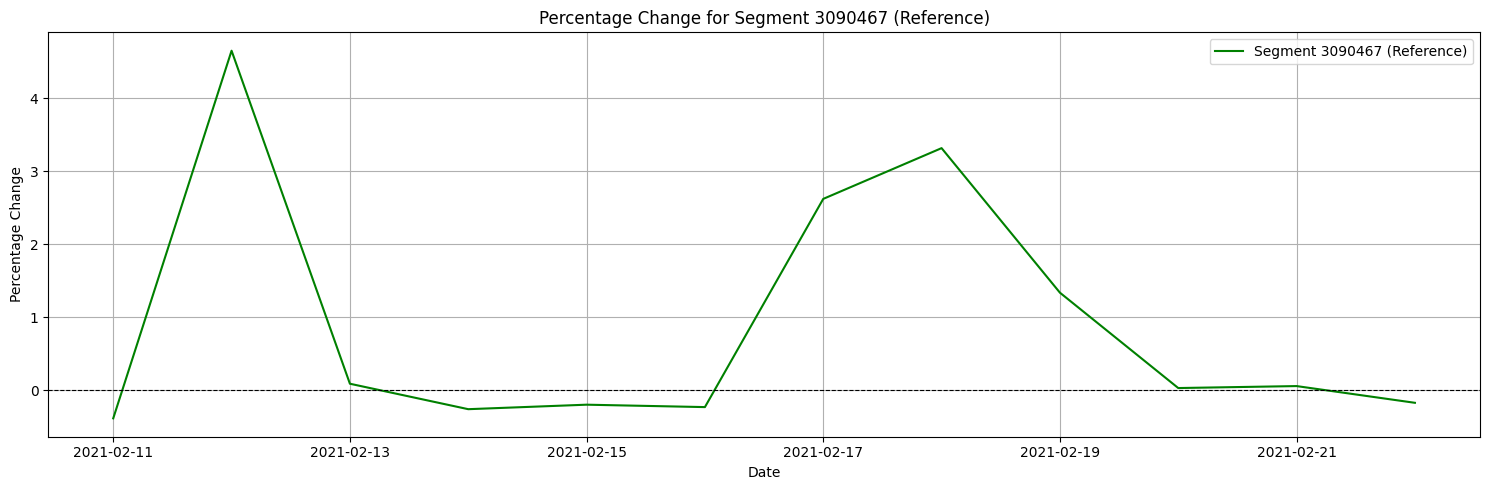

In [21]:

# Pivot the data to have one column per segment (model)
pivoted_data = data.pivot(index='timestamp', columns='full_name', values='volume')

# Plot the volume trends for all segments
plt.figure(figsize=(15, 10))
pivoted_data.plot(ax=plt.gca(), legend=False, alpha=0.7)
plt.title('Volume Trends Across Segments Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend(pivoted_data.columns, bbox_to_anchor=(1.05, 1), loc='upper left', title="Segments")
plt.tight_layout()
plt.show()

# Highlight the volume for segment 3090467 as a reference
plt.figure(figsize=(15, 5))
plt.plot(pivoted_data.index, pivoted_data[3090467], label='Segment 3090467 (Reference)', color='green')
plt.title('Volume Trend for Segment 3090467')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Calculate the daily percentage change for each segment
pct_change_data = pivoted_data.pct_change()

# Plot the percentage change for all segments
plt.figure(figsize=(15, 10))
pct_change_data.plot(ax=plt.gca(), legend=False, alpha=0.7)
plt.title('Percentage Change in Volume Across Segments Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.legend(pct_change_data.columns, bbox_to_anchor=(1.05, 1), loc='upper left', title="Segments")
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

# Plot percentage change for segment 3090467 as a reference
plt.figure(figsize=(15, 5))
plt.plot(pct_change_data.index, pct_change_data[3090467], label='Segment 3090467 (Reference)', color='green')
plt.title('Percentage Change for Segment 3090467 (Reference)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.axhline(0, color='black', linestyle='--', linewidth=0.8)
plt.legend()
plt.tight_layout()
plt.show()

# Approach to Solve the Problem

## Objective
The goal is to analyze the dataset provided in sheet "Q4" to identify any erroneous segments causing inconsistent delivery volumes in the client's ad campaign. Segment `3090467` has been identified as behaving as expected post-2/17 due to a budget increase. The task involves converting the data into a manageable format and using visualizations to pinpoint problematic segments.

---

## Step-by-Step Approach

### 1. **Load and Preprocess the Data**
   - Loaded the dataset from sheet "Q4" using `pandas` to perform data analysis.
   - Extracted the volume data for all 9 segments from the provided ranges in the sheet. 
   - **Note:** Since the dataset had a small range of values, I used hardcoded row indices to fetch the volume values corresponding to specific segments.

### 2. **Restructure the Data**
   - Converted the dataset from a long format to a manageable format using the following steps:
     - Created a timestamp for each day in the range `2021-02-10` to `2021-02-22`.
     - Mapped segment names (`seg_3131112`, `seg_3181097`, etc.) to their respective volumes for each date.
     - Used `pandas.pivot()` to pivot the data such that each segment became a column with corresponding daily volumes.

### 3. **Visualization of Volume Trends**
   - Plotted the volume trends for all segments across the date range to observe daily behavior.
   - Highlighted segment `3090467` in a separate plot to confirm its consistent behavior after the budget increase on `2021-02-17`.

### 4. **Analyze Percentage Changes**
   - Calculated the daily percentage change in volume for each segment using `pct_change()` to measure volatility.
   - Visualized the percentage changes for all segments to identify outliers or segments with unusually high variability.

### 5. **Identify Erroneous Segments**
   - Observed segments with inconsistent delivery or significant deviations in daily percentage changes compared to others.
   - Used the consistent behavior of segment `3090467` as a baseline for comparison.

---

## Data Handling Notes
- **Hardcoded Row Values:** Since the range of data was small and well-defined in the dataset, I used hardcoded row indices to extract the volume data for each segment and date. This approach was efficient given the dataset size but might require dynamic adjustments for larger or varying datasets.

---

## Outcome
- Successfully converted the dataset into a more user-friendly format, allowing for easy comparison of segment performance over time.
- Identified segments with abnormal delivery patterns through visualizations and percentage change analysis.

## Tools Used
- **Libraries:** Python, `pandas`, `matplotlib`.
- **Techniques:** Data wrangling, pivoting, time series visualization, percentage change analysis.

---

This approach provides a clear methodology for handling the dataset, identifying inconsistent segments, and offering insights to resolve client concerns. For dynamic datasets, I recommend automating the range extraction process to avoid hardcoding.
